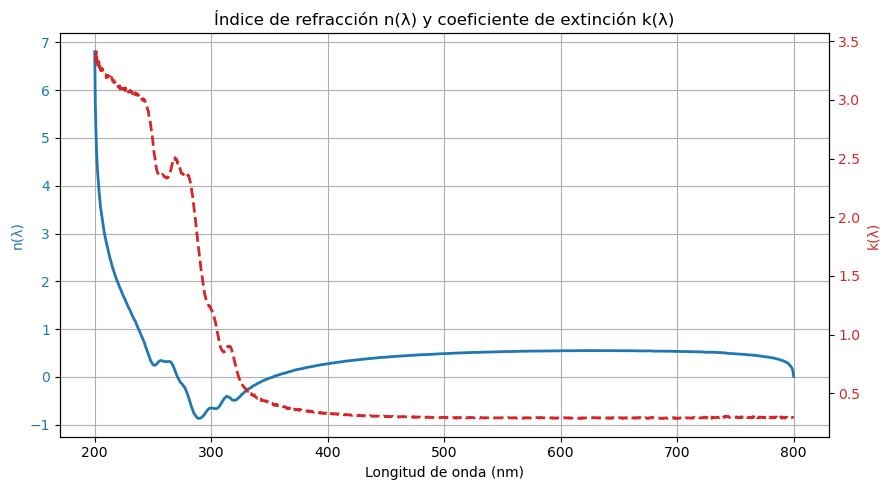

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Leer archivo de datos
datos=np.loadtxt("absaba.txt", comments='#')
lambda_vals=datos[:,0]
k_vals=datos[:,1]

# 2️⃣ Verificar espaciado uniforme
delta_lambda=lambda_vals[1]-lambda_vals[0]
if not np.allclose(np.diff(lambda_vals),delta_lambda):
    raise ValueError("Las longitudes de onda no están uniformemente espaciadas.")

# 3️⃣ Calcular n(λ) usando Kramers-Kronig discreta
n_vals = np.zeros_like(lambda_vals)
for i, lambda_i in enumerate(lambda_vals):
    suma = 0.0
    for j, lambda_j in enumerate(lambda_vals):
        if i!=j:
            suma +=k_vals[j]/(lambda_j**2-lambda_i**2)
    n_vals[i]=1+(2*lambda_i/np.pi)*suma*delta_lambda

# 4️⃣ Graficar con doble eje Y
fig, ax1=plt.subplots(figsize=(9,5))

# Primer eje Y: n(λ)
color_n='tab:blue'
ax1.set_xlabel("Longitud de onda (nm)")
ax1.set_ylabel("n(λ)", color=color_n)
ax1.plot(lambda_vals, n_vals, color=color_n, linewidth=2, label="n(λ)")
ax1.tick_params(axis='y', labelcolor=color_n)
ax1.grid(True)

# Segundo eje Y: k(λ)
ax2 = ax1.twinx()
color_k = 'tab:red'
ax2.set_ylabel("k(λ)", color=color_k)
ax2.plot(lambda_vals, k_vals, color=color_k, linestyle='--', linewidth=2, label="k(λ)")
ax2.tick_params(axis='y', labelcolor=color_k)

# Título y presentación
plt.title("Índice de refracción n(λ) y coeficiente de extinción k(λ)")
fig.tight_layout()
plt.show()
